In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('data/musicgenre.csv')

# Handle missing values
df = df.dropna(subset=['music_genre'])
df = df.replace("?", None).dropna()

# Encode categorical features
encoder = LabelEncoder()
df['music_genre'] = encoder.fit_transform(df['music_genre'])
df['key'] = encoder.fit_transform(df['key'])
df['mode'] = encoder.fit_transform(df['mode'])
df.head()

# Scale the features
df["duration_ms"] = df["duration_ms"] / 1000

# Drop irrelevant columns
df.drop(['track_name', 'instance_id', 'obtained_date', 'artist_name'], axis=1, inplace=True)

# Split the data into features and target
X = df.drop(columns=['music_genre'])
y = df['music_genre']
X.head()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

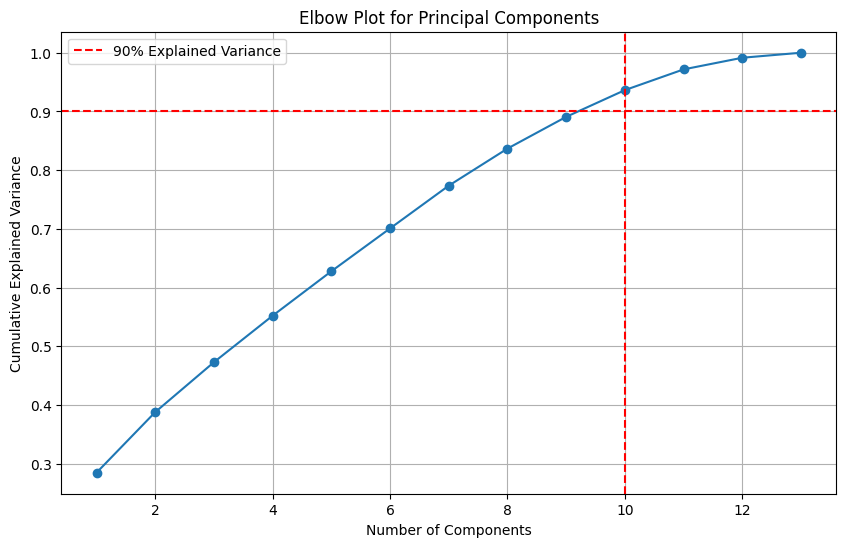

In [23]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Elbow plot to determine the number of components to select
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for Principal Components')
plt.grid()
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.axvline(x=np.where(cumulative_variance >= 0.9)[0][0] + 1, color='r', linestyle='--')
plt.legend()
plt.show()

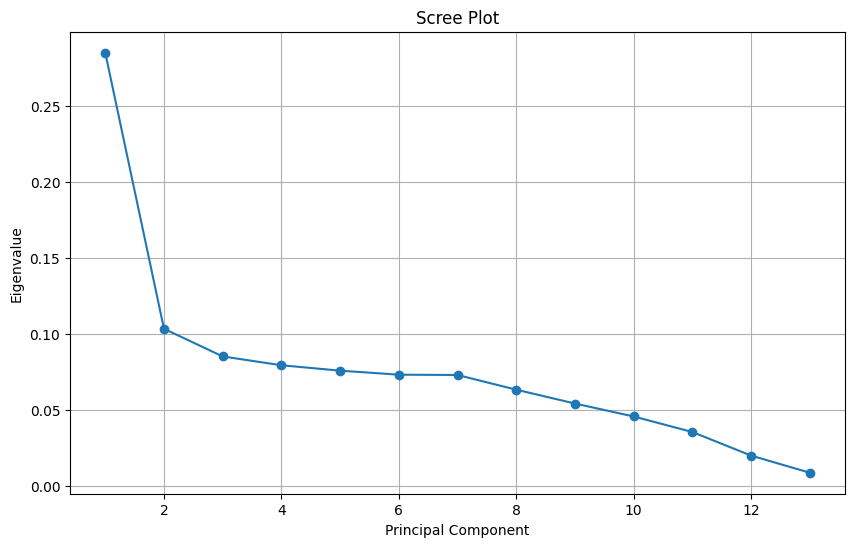

In [24]:
# Scree plot to show the eigenvalues of each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

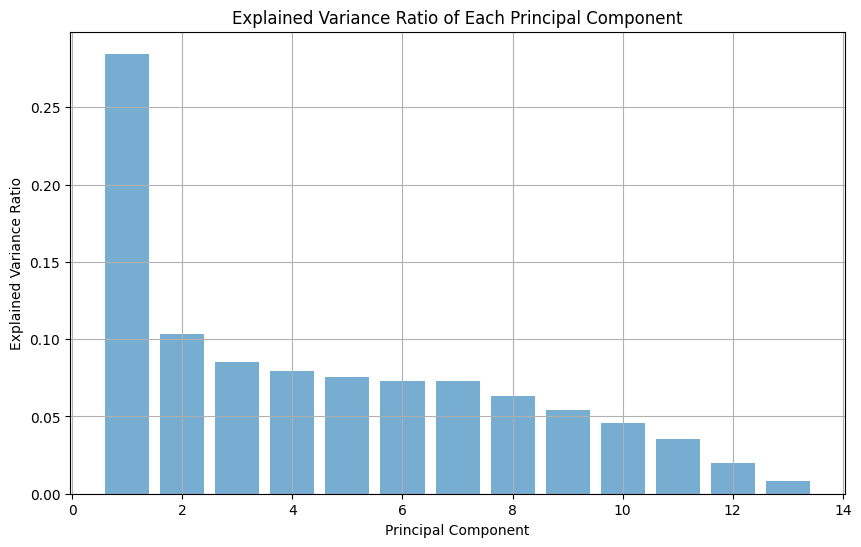

In [25]:
# Histogram of explained variance by each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.grid()
plt.show()

In [26]:
# Contribution of each feature to the components
components = pd.DataFrame(pca.components_, columns=X.columns)
components.index = [f'PC{i+1}' for i in range(len(components))]

# Print component contributions for each feature
print("Contribution of each feature to the principal components:")
# print(components)

Contribution of each feature to the principal components:


In [33]:
# Perform PCA to reduce to 2 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

In [34]:
# Define models to be trained
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "accuracy": accuracy,
        "report": report
    }
    print(f"{name} Model")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# Compare model performance
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    for label, metrics in result['report'].items():
        if isinstance(metrics, dict):
            metrics_str = ", ".join([f"{key}: {value:.2f}" for key, value in metrics.items()])
            print(f"  {label}: {metrics_str}")
    print("-" * 60)

Random Forest Model
Accuracy: 0.4790463497704724
              precision    recall  f1-score   support

           0       0.33      0.30      0.32      1349
           1       0.68      0.63      0.65      1349
           2       0.49      0.43      0.46      1341
           3       0.78      0.83      0.80      1350
           4       0.45      0.49      0.46      1346
           5       0.53      0.51      0.52      1340
           6       0.34      0.37      0.35      1356
           7       0.47      0.44      0.45      1356
           8       0.30      0.28      0.29      1351
           9       0.43      0.51      0.46      1368

    accuracy                           0.48     13506
   macro avg       0.48      0.48      0.48     13506
weighted avg       0.48      0.48      0.48     13506

------------------------------------------------------------
SVM Model
Accuracy: 0.541981341625944
              precision    recall  f1-score   support

           0       0.40      0.34     